# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

# SET-1 ( BOW )


## 1.1 Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AAIC/Assignments/8.Apply Naive Bayes on Donors Choose dataset/practice/preprocessed_data.csv',nrows=50000)

In [3]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

## 1.2 Splitting data into Train and cross validation(or test): Stratified Sampling

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label



In [5]:
from sklearn.model_selection import train_test_split
y = data['project_is_approved']
x = data.drop(['project_is_approved'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y,)#random_state=42)
print(x_train.shape,'\n',x_test.shape,'\n',y_train.shape,'\n',y_test.shape,'\n')
bow_feat = list()
tfidf_feat = list()
rem_feat = list()

(33500, 8) 
 (16500, 8) 
 (33500,) 
 (16500,) 



##1.3 Make Data Model Ready: encoding eassay, and project_title

In [6]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [7]:
def stemming(data,text_column):
  from nltk.tokenize import word_tokenize
  #from nltk.stem.wordnet import WordNetLemmatizer
  #lmtzr = WordNetLemmatizer()
  from nltk.stem import PorterStemmer 
  from tqdm import tqdm
  import warnings
  warnings.filterwarnings("ignore")

  ps = PorterStemmer()
  l = list()
  for i,row in (enumerate(tqdm(data[str(text_column)]))):
    for words in row.split():
        for w in word_tokenize(words):
            l.append(ps.stem(w))
            #print(ps.stem(w),words)
    data[text_column][i] = ' '.join(l)
  del l
  return data


In [8]:
#x_train = stemming(x_train,'essay')
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_bow = CountVectorizer(min_df=10,ngram_range=(1,2), max_features=5000,stop_words='english')
vectorizer_bow.fit(x_train['essay'].values)
x_train_essay_feat_bow = vectorizer_bow.transform(x_train['essay'].values)
x_test_essay_feat_bow = vectorizer_bow.transform(x_test['essay'].values)
print(x_train_essay_feat_bow.shape)
bow_feat.extend(vectorizer_bow.get_feature_names())




(33500, 5000)


##1.4 Make Data Model Ready: encoding numerical, categorical features

In [9]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [10]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
#indx = x_train.index.values.tolist()
normalizer.fit(x_train['price'].values.reshape(1,-1))
#x_train['price'] = (pd.DataFrame((a.transform(x_train['price'].values.reshape(1,-1))).reshape(-1,1),index=indx))
x_train_price_feat =  normalizer.transform(x_train['price'].values.reshape(1,-1)).reshape(-1,1)
x_test_price_feat =  normalizer.transform(x_test['price'].values.reshape(1,-1)).reshape(-1,1)
print(x_train_price_feat.shape,'\n')
rem_feat.append('PRICE')

normalizer = Normalizer()
normalizer.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
#x_train['teacher_number_of_previously_posted_projects'] = pd.DataFrame(bb.reshape(-1,1),index=indx)
x_train_prev_pos_proj_feat = (normalizer.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))).reshape(-1,1)
x_test_prev_pos_proj_feat = (normalizer.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))).reshape(-1,1)
print(x_train_prev_pos_proj_feat.shape)
rem_feat.append('teacher_number_of_previously_posted_projects')

(33500, 1) 

(33500, 1)


In [11]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['teacher_prefix'].values)
x_train_teacher_prefix_feat = vectorizer.transform(x_train['teacher_prefix'].values)
x_test_teacher_prefix_feat = vectorizer.transform(x_test['teacher_prefix'].values)
print(x_train_teacher_prefix_feat.shape)
rem_feat.extend(vectorizer.get_feature_names())

(33500, 5)


In [12]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['project_grade_category'].values)
x_train_grade_feat = vectorizer.transform(x_train['project_grade_category'].values)
x_test_grade_feat = vectorizer.transform(x_test['project_grade_category'].values)
print(x_train_grade_feat.shape)
rem_feat.extend(vectorizer.get_feature_names())

(33500, 4)


In [13]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values)
x_train_schl_state_feat = vectorizer.transform(x_train['school_state'].values)
x_test_schl_state_feat = vectorizer.transform(x_test['school_state'].values)
print(x_train_schl_state_feat.shape)
rem_feat.extend(vectorizer.get_feature_names())

(33500, 51)


In [14]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)
x_train_catg_feat = vectorizer.transform(x_train['clean_categories'].values)
x_test_catg_feat = vectorizer.transform(x_test['clean_categories'].values)
print(x_train_catg_feat.shape)
rem_feat.extend(vectorizer.get_feature_names())

(33500, 9)


In [15]:
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)
x_train_subcatg_feat = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcatg_feat = vectorizer.transform(x_test['clean_subcategories'].values)
print(x_train_subcatg_feat.shape)
rem_feat.extend(vectorizer.get_feature_names())

(33500, 30)


In [16]:
from scipy.sparse import hstack
X_train_bow = hstack((x_train_essay_feat_bow,x_train_price_feat,x_train_prev_pos_proj_feat,
                x_train_teacher_prefix_feat, x_train_grade_feat, x_train_schl_state_feat, 
                x_train_catg_feat,x_train_subcatg_feat)).tocsr()

X_test_bow = hstack((x_test_essay_feat_bow,x_test_price_feat,x_test_prev_pos_proj_feat,
                x_test_teacher_prefix_feat, x_test_grade_feat, x_test_schl_state_feat, 
                x_test_catg_feat,x_test_subcatg_feat)).tocsr()



##1.5 Appling NB on different kind of featurization as mentioned in the instructions

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [17]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
import numpy as np
from sklearn.metrics import  make_scorer
MNB = MultinomialNB()
params = [
           { 'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100],
             'class_prior':[[0.5,0.5]] 
           }
         ]
auc_ = make_scorer(roc_auc_score)

clf_bow = GridSearchCV(estimator=MNB,param_grid=params,n_jobs=-1,verbose=1,scoring=auc_,cv=10,return_train_score=True)
clf_bow.fit(X_train_bow,y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   10.3s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                    0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                          'class_prior': [[0.5, 0.5]]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(roc_auc_score), verbose=1)

In [19]:
import math as m
import matplotlib.pyplot as plt
alphas = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]  
def plot_hyper_vs_auc(model,alphas):
  x_ax = [m.log(i,10) for i in alphas]
  r = pd.DataFrame(model.cv_results_)
  plt.plot(x_ax,r['mean_train_score'],'-o',label='Train-scores')
  plt.plot(x_ax,r['mean_test_score'],'-o',label='Cv-scores')
  plt.xlabel('Hyper-parameter')
  plt.ylabel('Area under ROC curve')
  plt.legend()
  plt.grid()
  plt.show()
  return 0


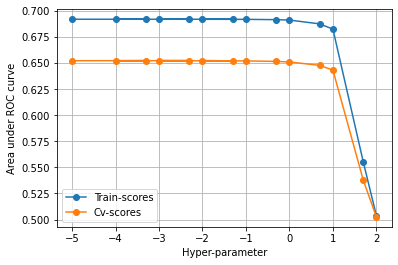

0

In [20]:
plot_hyper_vs_auc(model=clf_bow,alphas=alphas)

In [21]:
clf_bow.best_estimator_

MultinomialNB(alpha=0.0005, class_prior=[0.5, 0.5], fit_prior=True)

In [22]:
nb_bow = MultinomialNB(alpha=(clf_bow.best_estimator_).alpha,class_prior=[0.5,0.5])
nb_bow.fit(X_train_bow,y_train)
auc_train_bow = roc_auc_score(y_true=y_train,y_score=nb_bow.predict_proba(X_train_bow)[:,1])
auc_test_bow  = roc_auc_score(y_true=y_test,y_score=nb_bow.predict_proba(X_test_bow)[:,1])
print('auc_train_bow = ',auc_train_bow)
print('auc_test_bow. = ',auc_test_bow)

auc_train_bow =  0.7487043248245089
auc_test_bow. =  0.6883021025740808


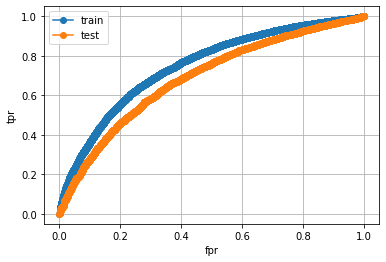

0

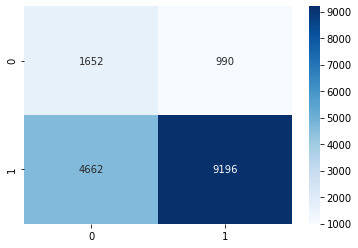

In [23]:
import seaborn as sns
def plot_roc(model,x_train,x_test,y_train,y_test):
  tr_fpr, tr_tpr, tr_thresholds = roc_curve(y_train,model.predict_proba(x_train)[:,1])
  ts_fpr, ts_tpr, ts_thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
  plt.plot(tr_fpr,tr_tpr,'-o',label='train')
  plt.plot(ts_fpr,ts_tpr,'-o',label='test')
  plt.xlabel('fpr')
  plt.ylabel('tpr')
  plt.legend()
  plt.grid()
  plt.show()
  
  # https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
  cm = confusion_matrix(y_test,model.predict(x_test))
  sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
  return 0
plot_roc(nb_bow,X_train_bow,X_test_bow,y_train,y_test)


In [24]:
pd.DataFrame(nb_bow.feature_log_prob_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5061,5062,5063,5064,5065,5066,5067,5068,5069,5070,5071,5072,5073,5074,5075,5076,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086,5087,5088,5089,5090,5091,5092,5093,5094,5095,5096,5097,5098,5099,5100
0,-9.712298,-8.510509,-7.760205,-9.690792,-9.852058,-8.976597,-9.480499,-8.831416,-9.669739,-10.075199,-9.779739,-9.985588,-8.915973,-9.852058,-10.208728,-9.589697,-10.245095,-8.770262,-9.570649,-10.362876,-8.550514,-10.405434,-9.827366,-9.008346,-9.930019,-9.852058,-10.173637,-9.734277,-7.984120,-7.991872,-9.515590,-9.852058,-9.533608,-8.849598,-9.903351,-9.985588,-10.496404,-10.208728,-8.299201,-8.955978,...,-13.540451,-7.104799,-13.540451,-6.727505,-7.877988,-5.794650,-5.909519,-7.438391,-7.015920,-13.540451,-7.229215,-13.540451,-8.720665,-9.803269,-8.831416,-10.545193,-8.019488,-11.461446,-7.782047,-8.184362,-10.075199,-10.901857,-9.570649,-7.847217,-8.027520,-7.074805,-8.465773,-6.262321,-6.595899,-6.313288,-8.813558,-8.712633,-8.650598,-10.650551,-9.210211,-8.858815,-7.015920,-8.592187,-7.837166,-13.540451
1,-9.766587,-8.355902,-7.801464,-9.559205,-10.141653,-8.876143,-9.679919,-8.662504,-9.852476,-10.318004,-10.129749,-9.922110,-8.986772,-9.971381,-10.033901,-9.457530,-10.346992,-8.722958,-9.359751,-10.222694,-8.393759,-10.178243,-10.172051,-9.212277,-10.017901,-9.870576,-10.296802,-9.653846,-7.800887,-7.813065,-9.500747,-9.946442,-9.148182,-8.626331,-9.971381,-9.936638,-10.197052,-9.991789,-8.384418,-9.029168,...,-12.957015,-7.267720,-15.259150,-6.725207,-7.894470,-5.740576,-6.039756,-7.498331,-7.213741,-15.259150,-7.419337,-15.259150,-8.973651,-9.821569,-8.884625,-10.463856,-8.239459,-11.085255,-8.065213,-8.288920,-10.216222,-11.388439,-9.931772,-7.837276,-8.240353,-6.971116,-8.500394,-6.183413,-6.578130,-6.422550,-8.588883,-8.937084,-8.844552,-10.840804,-9.113320,-8.856075,-7.213741,-9.061170,-8.046618,-15.259150


In [25]:
def get_top_feat(model,all_features,top_feat):
  ind_0 = np.argsort(model.feature_log_prob_[0])
  ind_1 = np.argsort(model.feature_log_prob_[1])

  #https://stackoverflow.com/questions/18272160/access-multiple-elements-of-list-knowing-their-index
  from operator import itemgetter  
  imp_feat_0 =list(itemgetter(*ind_0)(all_features))[:top_feat]
  imp_feat_1 =list(itemgetter(*ind_1)(all_features))[:top_feat]
  print('imp_feat_0',imp_feat_0,'\n')
  print('imp_feat_1',imp_feat_1,'\n')
  return 0

In [26]:
all_features = bow_feat + rem_feat
top_feat = 20
get_top_feat(model=nb_bow,all_features=all_features,top_feat=top_feat)

imp_feat_0 ['warmth', 'nd', 'care_hunger', 'wy', 'warmth', 'care_hunger', 'dr', 'kore wobble', 'ri', 'wobble cushions', 'dash dot', 'fitbits', 'discs', 'piano', 'kindle fires', 'vt', 'fitbit', 'book bins', 'chromebooks allow', 'kore'] 

imp_feat_1 ['warmth', 'care_hunger', 'care_hunger', 'warmth', 'dr', 'wy', 'vt', 'nd', 'financialliteracy', 'mt', 'teacher_number_of_previously_posted_projects', 'economics', 'ri', 'nh', 'sd', 'parentinvolvement', 'ne', 'PRICE', 'ak', 'want come'] 



0

# SET-2 ( TF-IDF)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1,3),stop_words='english')
vectorizer_tfidf.fit(x_train['essay'].values)
x_train_essay_feat_tfidf = vectorizer_tfidf.transform(x_train['essay'].values)
x_test_essay_feat_tfidf = vectorizer_tfidf.transform(x_test['essay'].values)
print(x_train_essay_feat_tfidf.shape)
tfidf_feat.extend(vectorizer_tfidf.get_feature_names())



(33500, 3983718)


In [37]:
X_train_tfidf = hstack((x_train_essay_feat_tfidf,x_train_price_feat,x_train_prev_pos_proj_feat,
                x_train_teacher_prefix_feat, x_train_grade_feat, x_train_schl_state_feat, 
                x_train_catg_feat,x_train_subcatg_feat)).tocsr()

X_test_tfidf = hstack((x_test_essay_feat_tfidf,x_test_price_feat,x_test_prev_pos_proj_feat,
                x_test_teacher_prefix_feat, x_test_grade_feat, x_test_schl_state_feat, 
                x_test_catg_feat,x_test_subcatg_feat)).tocsr()


In [38]:
clf_tfidf = GridSearchCV(estimator=MNB,param_grid=params,n_jobs=-1,verbose=1,scoring=auc_,cv=10,return_train_score=True)
clf_tfidf.fit(X_train_tfidf,y_train)


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [1e-05, 0.0005, 0.0001, 0.005, 0.001, 0.05,
                                    0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                          'class_prior': [[0.5, 0.5]]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(roc_auc_score), verbose=1)

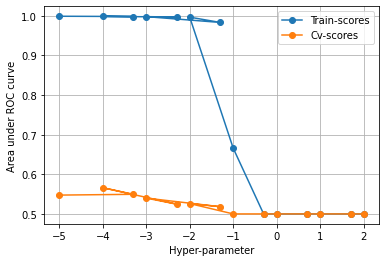

0

In [40]:
plot_hyper_vs_auc(model=clf_tfidf,alphas=alphas)

In [41]:
(clf_tfidf.best_estimator_)

MultinomialNB(alpha=0.0001, class_prior=[0.5, 0.5], fit_prior=True)

In [42]:

nb_tfidf = MultinomialNB(alpha=(clf_tfidf.best_estimator_).alpha,class_prior=[0.5,0.5])
nb_tfidf.fit(X_train_tfidf,y_train)
auc_train_tfidf = roc_auc_score(y_true=y_train,y_score=nb_tfidf.predict_proba(X_train_tfidf)[:,1])
auc_test_tfidf  = roc_auc_score(y_true=y_test,y_score=nb_tfidf.predict_proba(X_test_tfidf)[:,1])
print('auc_train_tfidf = ',auc_train_tfidf)
print('auc_test_tfidf. = ',auc_test_tfidf)


auc_train_tfidf =  0.9999957600246846
auc_test_tfidf. =  0.620509839773133


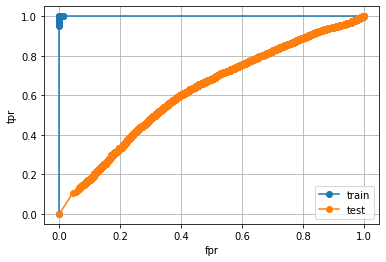

0

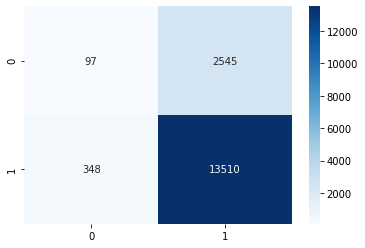

In [43]:
plot_roc(model=nb_tfidf,
         x_train=X_train_tfidf,
         x_test=X_test_tfidf,
         y_train=y_train,
         y_test=y_test)

In [44]:
all_features = tfidf_feat + rem_feat
top_feat = 20
get_top_feat(model=nb_tfidf,all_features=all_features,top_feat=top_feat)

imp_feat_0 ['creativity learning make', 'focus sitting focused', 'focus sitting groups', 'focus sitting hard', 'focus sitting long', 'focus sitting rocking', 'focus sitting stools', 'focus sitting teacher', 'focus sitting working', 'focus situations', 'focus situations school', 'focus sitting desks', 'focus skill', 'focus skill set', 'focus skills disciplines', 'focus skills experiment', 'focus skills harder', 'focus skills help', 'focus skills need', 'focus skills older'] 

imp_feat_1 ['create mini movie', 'completely uncomfortable school', 'completely understand room', 'completely unmotivated work', 'completeness', 'completers state', 'completes project printed', 'completes requirements', 'completes school family', 'completes teaching', 'flags easily', 'flags desire', 'completes teaching new', 'completes tests', 'completes tests assignments', 'completely transform space', 'completes various projects', 'completes word', 'completing 20', 'completing 20 word'] 



0

# 2.Summary
<br> as mentioned in the step 5 of instructions

In [45]:
#https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
t = PrettyTable(['Vectorizer', 'Model' , 'Hyper parameter' , 'AUC'])
#print(clf.best_estimator_,'\n',auc_test)
t.add_row(['BOW', 'MultinomialNB',(clf_bow.best_estimator_).alpha,auc_test_bow])
t.add_row(['TFIDF', 'MultinomialNB',(clf_tfidf.best_estimator_).alpha,auc_test_tfidf])
print(t)

+------------+---------------+-----------------+--------------------+
| Vectorizer |     Model     | Hyper parameter |        AUC         |
+------------+---------------+-----------------+--------------------+
|    BOW     | MultinomialNB |      0.0005     | 0.6883021025740808 |
|   TFIDF    | MultinomialNB |      0.0001     | 0.620509839773133  |
+------------+---------------+-----------------+--------------------+
